<a href="https://colab.research.google.com/github/gkpatell/INDE-577-Final-Project/blob/main/Supervised%20Learning/Logistic%20Regression/SL_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step 1: Import Required Librabries

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Enable inline plots for Jupyter Notebook
%matplotlib inline

## Step 2: Load and Explore the Dataset

In [ ]:
# Using a unique dataset: Titanic dataset from Kaggle
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"

data = pd.read_csv(url)

In [ ]:
# Display the first few rows of the dataset
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Initial Dataset Analysis

In [ ]:
# Basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Check for missing values
print("Missing Values:")
print(data.isnull().sum())

Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
# Drop unnecessary columns for prediction
columns_to_drop = ["Name", "Ticket", "Cabin"]
data.drop(columns=columns_to_drop, inplace=True)

In [ ]:
# Fill missing values
# Fill 'Age' with median and 'Embarked' with mode
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

<ipython-input-8-d70a6603d958>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
<ipython-input-8-d70a6603d958>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [ ]:
# Encode categorical variables
data = pd.get_dummies(data, columns=["Sex", "Embarked"], drop_first=True)

In [ ]:
# Display the cleaned dataset
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


## Step 3: Preprocessing the Data

In [ ]:
# Define features (X) and labels (y)
X = data.drop(columns=["Survived"])
y = data["Survived"]

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Step 4: Implement the Logistic Regression Algorithm

In [ ]:
# Initialize the Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
# Train the model
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = logistic_model.predict(X_test)

## Step 5: Evaluate the Model

In [ ]:
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.80


In [ ]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       110
           1       0.78      0.68      0.73        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



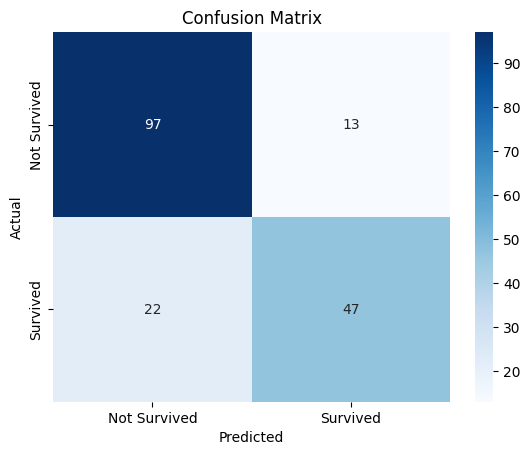

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Survived", "Survived"], yticklabels=["Not Survived", "Survived"])
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

## Step 6: Performance and Error Analysis

In [ ]:
# Analyze False Positives and False Negatives
false_positives = ((y_test == 0) & (y_pred == 1)).sum()
false_negatives = ((y_test == 1) & (y_pred == 0)).sum()

print(f"False Positives: {false_positives}")
print(f"False Negatives: {false_negatives}")

False Positives: 13
False Negatives: 22


In [ ]:
# Investigate incorrectly classified samples
misclassified_indices = np.where(y_test != y_pred)[0]
print("Misclassified Samples:")
print(data.iloc[misclassified_indices])

Misclassified Samples:
     PassengerId  Survived  Pclass   Age  SibSp  Parch      Fare  Sex_male  \
2              3         1       3  26.0      0      0    7.9250     False   
5              6         0       3  28.0      0      0    8.4583      True   
23            24         1       1  28.0      0      0   35.5000      True   
27            28         0       1  19.0      3      2  263.0000      True   
28            29         1       3  28.0      0      0    7.8792     False   
32            33         1       3  28.0      0      0    7.7500     False   
34            35         0       1  28.0      1      0   82.1708      True   
35            36         0       1  42.0      1      0   52.0000      True   
36            37         1       3  28.0      0      0    7.2292      True   
41            42         0       2  27.0      1      0   21.0000     False   
51            52         0       3  21.0      0      0    7.8000      True   
52            53         1       1  49.0 

## Step 7: Advanced Metrics and Visualization

In [ ]:
# Calculate ROC-AUC
probs = logistic_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, probs)
print(f"ROC-AUC Score: {roc_auc:.2f}")

ROC-AUC Score: 0.84


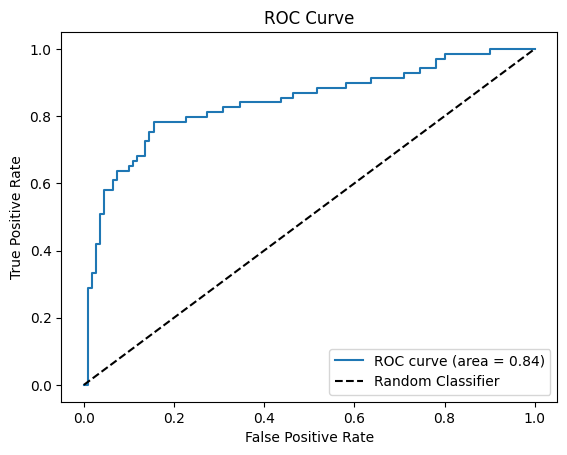

In [ ]:
# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, probs)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, probs)
average_precision = average_precision_score(y_test, probs)

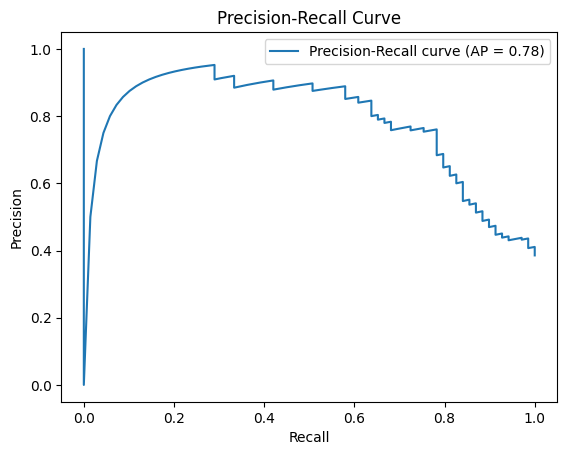

In [ ]:
plt.plot(recall, precision, label=f'Precision-Recall curve (AP = {average_precision:.2f})')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

## Step 8: Visualizing Coefficients

<ipython-input-26-010c948f4f54>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Coefficient", y="Feature", data=coeff_df, palette="viridis")


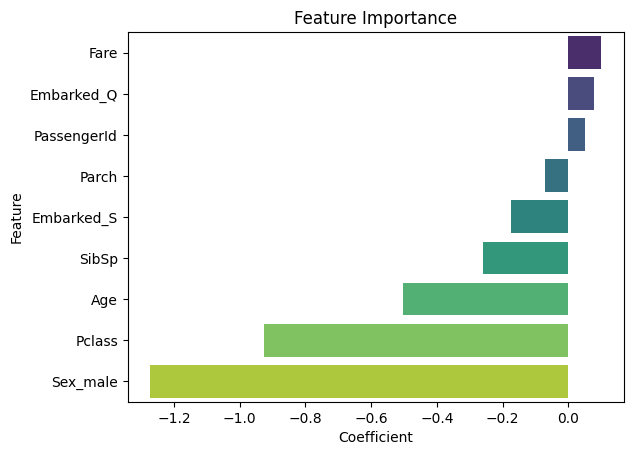

In [ ]:
# Retrieve and plot feature coefficients
coefficients = logistic_model.coef_[0]
feature_names = X.columns

coeff_df = pd.DataFrame({"Feature": feature_names, "Coefficient": coefficients})
coeff_df.sort_values(by="Coefficient", ascending=False, inplace=True)

sns.barplot(x="Coefficient", y="Feature", data=coeff_df, palette="viridis")
plt.title("Feature Importance")
plt.xlabel("Coefficient")
plt.ylabel("Feature")
plt.show()